# Python examples and EDA examples

## Import Modules

In [2]:
# Import the Modules and set up matplotlib
import matplotlib as plt
%matplotlib inline

# Import modules
import pandas as pd
# Set Pandas options to always display floats with a decimal point
# (not scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)


## Reading a CSV File

In [3]:
# Read in a CSV data file from a web URL
url = "https://raw.githubusercontent.com/professorholowczak/market_data/main/trades_sample_header.csv"
df = pd.read_csv(url, sep=",")

# read_csv options:
# Use the first row of the file for column names         header=0
# Skip lines in the file that can not be parsed          on_bad_lines='skip'
# Show an error (stop processing the file)               error_bad_lines=False
# Read a GZIP compressed file:                           compression='gzip'
# Only read in the first 1000 rows:                      nrows=1000
# Read the whole file in at once, then determine types:  low_memory=False
# Delimiters     Default: sep=','   Tab: sep='\t'   Semicolon: sep=';'
# ... many more


# Getting basic dataframe information

In [15]:
# Show the data types that were parsed automatically
print("Output for df.info()")
print(df.info())

# Check some sample data
print("Output for df.head()")
print(df[['trading_date_time','symbol','trade_price']].head(15))
# Notice the trading_date_time was not parsed as a date and time column

# Get some descriptive statistics about the numeric data in the dataframe
# Check how the min and max values compare the mean - check for outliers
print("Output for df.describe()")
print(df.describe())

Output for df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192220 entries, 0 to 192219
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trading_date_time  192220 non-null  object 
 1   network            192220 non-null  object 
 2   message_category   192220 non-null  object 
 3   message_type       192220 non-null  object 
 4   message_sequence   192220 non-null  int64  
 5   market_exchange    192220 non-null  object 
 6   symbol             192220 non-null  object 
 7   trade_price        192220 non-null  float64
 8   trade_volume       192220 non-null  int64  
 9   trade_conditions   192220 non-null  object 
 10  trade_conditions2  98400 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 16.1+ MB
None
Output for df.head()
          trading_date_time symbol  trade_price
0   2012-08-21 04:12:16.827    BMI       190.00
1   2012-08-21 04:12:21.658    BMI       190.0

## Finding and working with Nulls

In [16]:
# Which columns have nulls or NaN ?
print("Columns with null values", df.columns[df.isnull().any()].tolist()  )

# How many rows have nulls?
print("Rows with null values:", df.isnull().any(axis=1).sum())

# Replace NaN with "" in Trade conditions columns
# Need to be careful with this
# Do no replace all missing values with "0"
df.trade_conditions.fillna("", inplace=True)
df.trade_conditions2.fillna("", inplace=True)

# Drop records with nulls in certain columns  (we don't need to do this for this example)
# df = df.dropna(axis=0, subset=['put column names here'])


Columns with null values ['trade_conditions2']
Rows with null values: 93820


## Converting to Datetime


In [17]:
# Parse the column and convert into a datetime data type
# Use the Date and time format patterns
#
#    %m   Month as zero-padded number (01, 02, ... 12)
#    %d   Day of the month as zero-padded number (01, 02, ... 31)
#    %y   Year with century as number (2020, 2021, 2022, ...)
#    %H   Hour (24-hour clock) as zero-padded number (00, 01, ... 23)
#    %I   Hour (12-hour clock) as zero-padded number (01, 02, ... 12)
#    %p   AM or PM
#    %M   Minute as zero-padded number (00, 01, ... 59)
#    %S   Second as zero-padded number (00, 01, ... 59)
#    %f   Milliseconds as zero-padded number (000 ... 999)
df["trading_date_time"] = pd.to_datetime(df["trading_date_time"], format="%Y-%m-%d %H:%M:%S.%f")
# Show the data types that were parsed automatically
print(df.info())

# Describe each of the numerical columns
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192220 entries, 0 to 192219
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trading_date_time  192220 non-null  datetime64[ns]
 1   network            192220 non-null  object        
 2   message_category   192220 non-null  object        
 3   message_type       192220 non-null  object        
 4   message_sequence   192220 non-null  int64         
 5   market_exchange    192220 non-null  object        
 6   symbol             192220 non-null  object        
 7   trade_price        192220 non-null  float64       
 8   trade_volume       192220 non-null  int64         
 9   trade_conditions   192220 non-null  object        
 10  trade_conditions2  192220 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 16.1+ MB
None
       message_sequence  trade_price  trade_volume
count         192220.00

## Defining a Function
    Notes about defining functions:
    Do one thing
    Give good parameter names
    Provide documentation
    Initialize all local variables
    Protect all calculations, especially division


In [18]:
# Define a function to calculate the dollar value of a trade
def calculate_trade_value(trade_price: float, trade_volume: int):
    """
    Calculate the dollar value of a trade using the
    formula: trade_value = trade_price * trade_volume

    :param trade_price: The price the stock traded at
    :param trade_volume: The number of shares traded
    :return: Price * Volume

    >>> calculate_trade_value(14.23, 200)
    2846.0
    """
    trade_value = 0.0
    try:
        trade_value = trade_price * float(trade_volume)
    except Exception as err:
        print("Failed to calculate trade_value.", err)
    return trade_value


In [19]:
# Make sure our test case works
# For Google CoLab run %doctest_mode first
%doctest_mode
import doctest
doctest.testmod(verbose=True)

Exception reporting mode: Context
Doctest mode is: OFF
Trying:
    calculate_trade_value(14.23, 200)
Expecting:
    2846.0
ok
1 items had no tests:
    __main__
1 items passed all tests:
   1 tests in __main__.calculate_trade_value
1 tests in 2 items.
1 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=1)

## Creating a new column from existing columns

In [20]:
# Three ways to calculate a new column from existing data
# 1) Calculate directly on the column references
# df['trade_value'] = df['trade_price'] * df['trade_volume']
#
# 2) Use a Lambda function with .apply
# df['trade_value'] = df.apply(lambda x: x['trade_price']*x['trade_volume'], axis=1)
#
# 3) Use a user-defined function with .apply

df['trade_value'] = df.apply(lambda x:calculate_trade_value(
                             x['trade_price'],
                             x['trade_volume']), axis=1)

# Check this new trade_value column
print( df[['trade_price', 'trade_volume', 'trade_value']].head(45) )



    trade_price  trade_volume  trade_value
0        190.00           100     19000.00
1        190.00            50      9500.00
2        189.92            50      9496.00
3        190.67           100     19067.00
4        190.43           600    114258.00
5        190.43            42      7998.06
6        190.68            40      7627.20
7        190.67            55     10486.85
8        190.69           105     20022.45
9        190.69           300     57207.00
10       190.69           100     19069.00
11       190.69            95     18115.55
12       190.75            75     14306.25
13       190.90           100     19090.00
14       190.94           200     38188.00
15       190.90           100     19090.00
16       190.90           100     19090.00
17       190.94           100     19094.00
18       190.94           100     19094.00
19       190.94           100     19094.00
20       190.93           100     19093.00
21       190.93           100     19093.00
22       19

## Filtering Rows

In [4]:
# Filtering rows
# Single criteria: Rows where trade price is larger than $585
print("Records where trade_price is greater than $585.00")
print( df[ df['trade_price'] > 585 ] )

# Filter on two conditions: Rows where trade price is larger
# than $585 AND trade volume is more than 100 shares
print("Records where trade_price is greater than $585.00 and the trade volume is more than 100 shares")
df[ (df['trade_price'] > 585) & (df['trade_volume'] > 100) ]


Records where trade_price is greater than $585.00
              trading_date_time network message_category message_type  message_sequence market_exchange symbol  trade_price  trade_volume trade_conditions trade_conditions2
102610  2012-08-21 08:00:59.626       T                A            U              1709               K   MOOT       585.30           100                T               NaN
102612  2012-08-21 08:09:15.990       T                W            U              1909               Q   MOOT       585.25            31              @TI               NaN
102613  2012-08-21 08:14:20.699       T                A            U              2019               K   MOOT       585.25           300                T               NaN
102617  2012-08-21 09:23:24.918       T                W            U              5136               Q   MOOT       585.50            10             @FTI               NaN
102618  2012-08-21 09:24:14.343       T                A            U              51

,trading_date_time,network,message_category,message_type,message_sequence,market_exchange,symbol,trade_price,trade_volume,trade_conditions,trade_conditions2
102613,2012-08-21 08:14:20.699,T,A,U,2019,K,MOOT,585.25,300,T,NaN
102618,2012-08-21 09:24:14.343,T,A,U,5164,D,MOOT,585.70,500,T,NaN


## Create a new Dataframe

In [22]:
# Create a new Dataframe with a subset of the data
#
high_volume_trades_df = df[ (df['trade_volume'] >= 1000) ]

# Note the difference between  df2 = df1     and   df2 = df1.copy()

# df2 = df1           df2 just points to the same set of data held in df1
# df2 = df1.copy()    df2 will contain a completely separate copy of the data

# Show some information on the high_volume_trades dataframe

high_volume_trades_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3443 entries, 38 to 192217
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   trading_date_time  3443 non-null   datetime64[ns]
 1   network            3443 non-null   object        
 2   message_category   3443 non-null   object        
 3   message_type       3443 non-null   object        
 4   message_sequence   3443 non-null   int64         
 5   market_exchange    3443 non-null   object        
 6   symbol             3443 non-null   object        
 7   trade_price        3443 non-null   float64       
 8   trade_volume       3443 non-null   int64         
 9   trade_conditions   3443 non-null   object        
 10  trade_conditions2  3443 non-null   object        
 11  trade_value        3443 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 349.7+ KB


## Aggregating Data

In [23]:
# Set Pandas options to always display floats with a decimal point
# (not scientific notation)
pd.options.display.float_format = '{:.2f}'.format

# Aggregating data
# For each ticker symbol, calculate the total trade_value of
# trades more than 1000 shares
# Functions:  groupby,  agg and sum

high_volume_trades_df.groupby(by="symbol").agg({"trade_value":sum})

# Other agg functions include: min, max, avg, std


,trade_value
symbol,
AVVB,142420005.25
BMI,98156121.43
GRIN,2051648.70
HMAT,14593472.20
MOOT,138076181.86
RAD,1491459.41
TAC,168041940.21
TMSF,570905786.19


## Basic Plots with Matplotlib

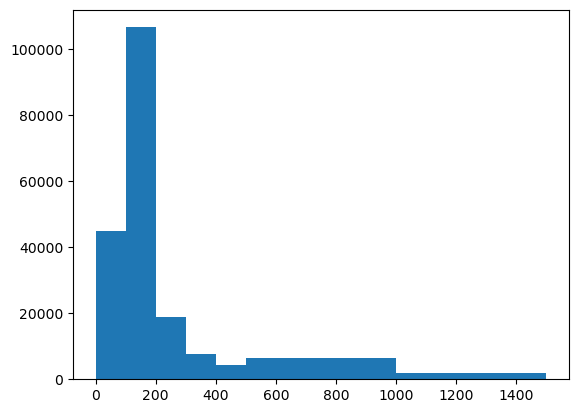

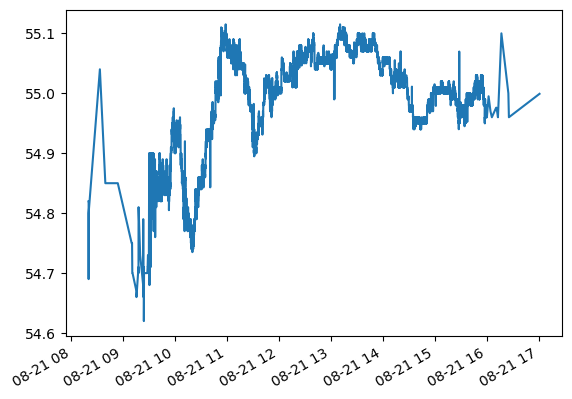

In [24]:
# Basic graphs/plots with Matplotlib
import matplotlib.pyplot as plt

# Plot a histogram from the trade volume data
# plt.hist(df['trade_volume'], bins = [0,100,101,500,501,1000])
plt.hist(df['trade_volume'], bins = [0,100,200,300,400,500,1000,1500])
# Show the plot
plt.show()

# Plot a price history for stock symbol AVVB
avvb_df = df.loc[df['symbol'] == 'AVVB'].copy()
plt.plot(avvb_df['trading_date_time'], avvb_df['trade_price'])
plt.gcf().autofmt_xdate()
# Show the plot
plt.show()



# Example 2 - Reading a JSON file

In [25]:
# Amazon Reviews data from https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/
# Citation: Justifying recommendations using distantly-labeled reviews and fined-grained aspects.
# Jianmo Ni, Jiacheng Li, Julian McAuley. Empirical Methods in Natural Language Processing (EMNLP), 2019
reviews_url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz"

# Read in the JSON document form the web (can take about 5 minutes)
reviews_df = pd.read_json(reviews_url, compression="gzip", lines='True')

# Options:  orient='records' and orient='index' are used when the
#           JSON file has either a key or numeric index for each JSON object.
# Option: lines=True   is used when the JSON file has one JSON object per line.

# Note - the above read_json will take a while to complete because the
# Appliances.json.gz file is about 50MB


## Exercises: Dropping Columns and Filtering Rows

In [26]:
# Show information on the columns
reviews_df.info()

# Note the "memory usage" line

# EXERCISE: Drop the "image" column using df.drop(..., inplace=True, axis='columns')
# https://www.w3schools.com/python/pandas/ref_df_drop.asp

# EXERCISE: Remove all records where the 'overall' column is missing data.
# Use the subset=[] and inplace= options
# https://www.w3schools.com/python/pandas/ref_df_dropna.asp




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         602777 non-null  int64 
 1   vote            65262 non-null   object
 2   verified        602777 non-null  bool  
 3   reviewTime      602777 non-null  object
 4   reviewerID      602777 non-null  object
 5   asin            602777 non-null  object
 6   style           137973 non-null  object
 7   reviewerName    602762 non-null  object
 8   reviewText      602453 non-null  object
 9   summary         602649 non-null  object
 10  unixReviewTime  602777 non-null  int64 
 11  image           9258 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 51.2+ MB


## Exercises: Counting words and characters

In [ ]:
# EXERCISE: Count the characters in the reviewText
# https://www.w3schools.com/python/ref_func_len.asp
reviews_df['reviewTextCharacters'] = reviews_df["reviewText"].__________

# EXERCISE: Count the number of words in the reviewText
# Use the 'split' function to split up the text into a list
# Use len() to get the length of the list
reviews_df['reviewTextWords'] = reviews_df["________"].str.split().str.len()

# EXERCISE: Count the occurrences of each value in the "overall" column
reviews_df.value_counts("_________")


## Exercises: Basic graphs

In [ ]:
# EXERCISE:  Create a histogram of the 'overall' product rating (1 through 5)
plt.hist(_______)
plt.show()

# EXERCISE: Create a histogram of the number of words in the reviewText
plt.hist(_______)
plt.show()

# EXERCISE: Create a scatter plot of overall rating and reviewTextWords
# https://www.w3schools.com/python/matplotlib_scatter.asp

plt.scatter(_______)
plt.show()


# Exploratory Data Analysis (EDA)

In [27]:
# If running on Google CoLab, import the auth module and authenticate
# from google.colab import auth
# auth.authenticate_user()
# If running in a Dataproc cluster, the authentication should already be in place

In [6]:
# Import pandas library
import pandas as pd
# Set Pandas options to always display floats with a decimal point
# (not scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)

import seaborn as sns

In [7]:
def perform_EDA(df : pd.DataFrame, filename : str):
    """
    perform_EDA(df : pd.DataFrame, filename : str)
    Accepts a dataframe and a text filename as inputs.
    Runs some basic statistics on the data and outputs to console.

    :param df: The Pandas dataframe to explore
    :param filename: The name of the data file
    :return:
    """
    print(f"{filename} Number of records:")
    print(df.count())
    print(f"{filename} Number of duplicate records: { len(df)-len(df.drop_duplicates())}" )
    print(f"{filename} Info")
    print(df.info())
    print(f"{filename} Describe")
    print(df.describe())
    print(f"{filename} Columns with null values")
    print(reviews_df.columns[reviews_df.isnull().any()].tolist())
    rows_with_null_values = reviews_df.isnull().any(axis=1).sum()
    print(f"{filename} Number of Rows with null values: {rows_with_null_values}" )
    integer_column_list = df.select_dtypes(include='int64').columns
    print(f"{filename} Integer data type columns: {integer_column_list}")
    float_column_list = df.select_dtypes(include='float64').columns
    print(f"{filename} Float data type columns: {float_column_list}")
    # Add other codes here to explore and visualize specific columns


In [8]:
# Amazon Product Reviews
# Reading data from Google Cloud Storage
# Path to Amazon Reviews files
filepath = "gs://amazon-reviews-rh"
# For public access use https
# filepath = "https://storage.cloud.google.com/amazon-reviews-rh"
# For local file access use /content
# filepath = "/content/"
# List of data files
filename_list = ['amazon_reviews_us_Apparel_v1_00.tsv']

for filename in filename_list:
    # Read in amazon reviews. Reminder: Tab-separated values files
    print(f"Working on file: {filename}")
    reviews_df = pd.read_csv(f"{filepath}/{filename}", sep='\t', on_bad_lines='skip', low_memory=False)
    perform_EDA(reviews_df,filename)


Working on file: amazon_reviews_us_Apparel_v1_00.tsv
amazon_reviews_us_Apparel_v1_00.tsv Number of records:
marketplace          5881874
customer_id          5881874
review_id            5881874
product_id           5881874
product_parent       5881874
product_title        5881862
product_category     5881874
star_rating          5881873
helpful_votes        5881873
total_votes          5881873
vine                 5881873
verified_purchase    5881873
review_headline      5881818
review_body          5881089
review_date          5881765
dtype: int64
amazon_reviews_us_Apparel_v1_00.tsv Number of duplicate records: 0
amazon_reviews_us_Apparel_v1_00.tsv Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881874 entries, 0 to 5881873
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  

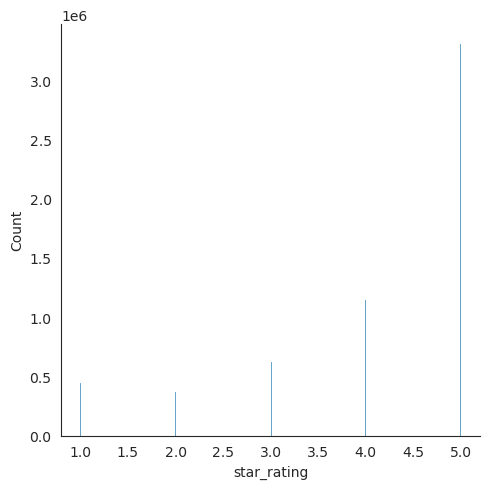

In [9]:
# Distribution plot using Seaborn
import seaborn as sns

# Set the style for Seaborn plots
sns.set_style("white")

# Create the distribution plot
dp = sns.displot(reviews_df.star_rating)


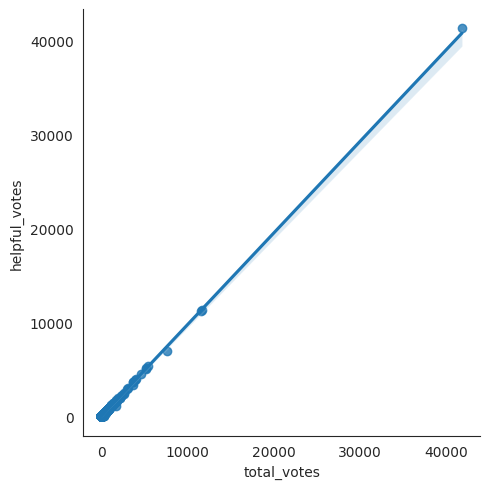

In [39]:
# Relationship plot using Seaborn
import seaborn as sns

# Set the style for Seaborn plots
sns.set_style("white")

# Create the relationship plot (Takes about 12 minutes!)
lp = sns.lmplot(x='total_votes', y='helpful_votes', data=reviews_df)



                customer_id  product_parent  star_rating  helpful_votes  total_votes
customer_id            1.00           -0.00         0.01           0.01         0.01
product_parent        -0.00            1.00         0.00           0.00         0.00
star_rating            0.01            0.00         1.00          -0.01        -0.01
helpful_votes          0.01            0.00        -0.01           1.00         1.00
total_votes            0.01            0.00        -0.01           1.00         1.00


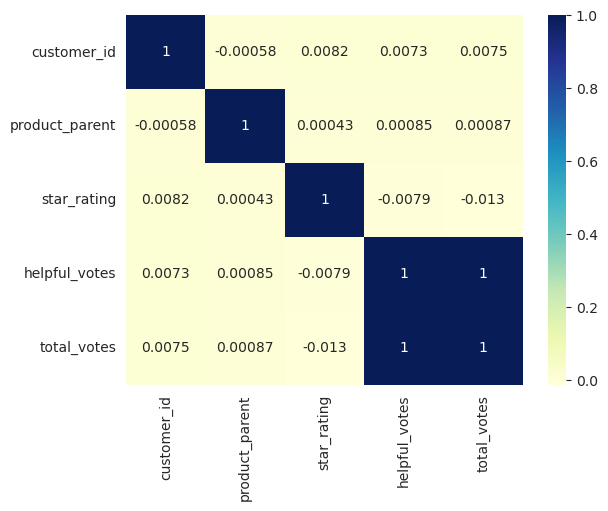

In [10]:
# Plot the correlation matrix
import seaborn as sns

numeric_columns = [ "customer_id", "product_parent", "star_rating", "helpful_votes", "total_votes" ]

# Select a subset of the columns
df = reviews_df[ numeric_columns ]

# Print the correlation matrix
print(df.corr())

# Plot the correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)




In [11]:
!pip install fastparquet

# Working with Parquet Files

In [18]:
# We need some additional modules to read Parquet files
# Install pyarrow and fastparquet modules
# sudo pip3 install pyarrow fastparquet
import pyarrow
import fastparquet
import pandas as pd

# Read a Parquet file
parquet_file_name = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
trips_df = pd.read_parquet(parquet_file_name, engine='pyarrow')



In [19]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [20]:
# Perform EDA on the file
perform_EDA(trips_df,parquet_file_name)

https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet Number of records:
VendorID                 3066766
tpep_pickup_datetime     3066766
tpep_dropoff_datetime    3066766
passenger_count          2995023
trip_distance            3066766
RatecodeID               2995023
store_and_fwd_flag       2995023
PULocationID             3066766
DOLocationID             3066766
payment_type             3066766
fare_amount              3066766
extra                    3066766
mta_tax                  3066766
tip_amount               3066766
tolls_amount             3066766
improvement_surcharge    3066766
total_amount             3066766
congestion_surcharge     2995023
airport_fee              2995023
dtype: int64
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet Number of duplicate records: 0
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries

In [14]:
# Download a file to the local /content file system
!curl -o yellow_tripdata_2023-01.parquet https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.4M  100 45.4M    0     0   154M      0 --:--:-- --:--:-- --:--:--  154M


In [15]:
# If your Parquet file is too large, you can read it in chunks
# Note this only works if the file is accessible locally (not from a URL)
# If necessary, download the parquet file first.
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa

# Set the number of rows to read in
rows_to_read = 1000
# Supply the path to the file name - must be on the local file system
parquet_file_name = "yellow_tripdata_2023-01.parquet"

# Create a pointer to the Parquet file
pf = ParquetFile(parquet_file_name)
# Pull the subset of rows
rows_subset = next(pf.iter_batches(batch_size = rows_to_read))
# Convert to a dataframe
df = pa.Table.from_batches([rows_subset]).to_pandas()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               1000 non-null   int64         
 1   tpep_pickup_datetime   1000 non-null   datetime64[ns]
 2   tpep_dropoff_datetime  1000 non-null   datetime64[ns]
 3   passenger_count        1000 non-null   float64       
 4   trip_distance          1000 non-null   float64       
 5   RatecodeID             1000 non-null   float64       
 6   store_and_fwd_flag     1000 non-null   object        
 7   PULocationID           1000 non-null   int64         
 8   DOLocationID           1000 non-null   int64         
 9   payment_type           1000 non-null   int64         
 10  fare_amount            1000 non-null   float64       
 11  extra                  1000 non-null   float64       
 12  mta_tax                1000 non-null   float64       
 13  tip_

In [16]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.70,1.52,2.96,1.13,164.84,162.81,1.26,16.95,1.73,0.49,3.25,0.15,0.98,25.19,2.30,0.05
std,0.46,0.89,3.23,3.11,68.56,73.51,0.52,13.40,1.25,0.08,3.43,1.11,0.16,16.16,0.73,0.25
min,1.00,0.00,0.00,1.00,4.00,4.00,1.00,-25.40,-1.00,-0.50,0.00,0.00,-1.00,-30.40,-2.50,0.00
25%,1.00,1.00,1.15,1.00,114.00,107.00,1.00,8.60,1.00,0.50,0.00,0.00,1.00,15.48,2.50,0.00
50%,2.00,1.00,1.93,1.00,161.00,161.00,1.00,12.80,1.00,0.50,2.85,0.00,1.00,20.52,2.50,0.00
75%,2.00,2.00,3.40,1.00,236.00,236.00,1.00,20.50,3.50,0.50,4.40,0.00,1.00,29.76,2.50,0.00
max,2.00,6.00,30.15,99.00,264.00,265.00,4.00,140.20,9.75,0.50,40.00,18.30,1.00,189.98,2.50,1.25
